<a href="https://colab.research.google.com/github/HauwaUmar/Air-Quality-Index-JupyterLab-PySpark-Workbench/blob/main/DATA_6600_CASE_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOADING DATA

In [55]:
import pandas as pd
  
df = pd.read_excel("data.xlsx")
df

,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,Province/Territory,EVENT START DATE,FATALITIES,INJURED/INFECTED,EVACUATED,...,EVENT END DATE,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY/PEOPLE AFFECTED,MAGNITUDE
0,Disaster,Natural,Meteorological - Hydrological,Hurricane / Typhoon / Tropical Storm,New Brunswick,NB,2014-07-05 00:00:00,0.0,0.0,0.0,...,NaN,NaN,12500000.0,NaN,NaN,NaN,NaN,420000.0,NaN,NaN
1,Disaster,Natural,Meteorological - Hydrological,Flood,Southern Manitoba,MB,2014-06-25 00:00:00,0.0,0.0,560.0,...,NaN,NaN,NaN,NaN,NaN,1.000000e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,Disaster,Natural,Geological,Landslide,Upper Arrow Lake BC,BC,1903-02-28 00:00:00,0.0,0.0,0.0,...,1903-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
809,Disaster,Natural,Meteorological - Hydrological,Flood,Saint John River Basin NB,NB,1902-03-01 00:00:00,2.0,0.0,0.0,...,1902-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [56]:
def info_on_missing_values(df):
    total_missing_values = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percentage = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    data_type = df.dtypes.sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    decription_of_missing_values = pd.concat([total_missing_values, percentage, data_type], axis=1, keys=['Total Missing Val','Percentage','Data Type'])
    return decription_of_missing_values

info_on_missing_values(df) #### remove [:10] to see all columns with missing values

,Total Missing Val,Percentage,Data Type
NGO PAYMENTS,800,98.77,float64
OGD COSTS,797,98.40,float64
MUNICIPAL COSTS,782,96.54,float64
INSURANCE PAYMENTS,740,91.36,float64
PROVINCIAL DEPARTMENT PAYMENTS,722,89.14,float64
NORMALIZED TOTAL COST,536,66.17,float64
ESTIMATED TOTAL COST,508,62.72,float64
PROVINCIAL DFAA PAYMENTS,486,60.00,float64
FEDERAL DFAA PAYMENTS,447,55.19,float64
INJURED/INFECTED,58,7.16,float64


we dont have data based on ngo, ogd,municipal,insurance 



*   how are to 
*   List item



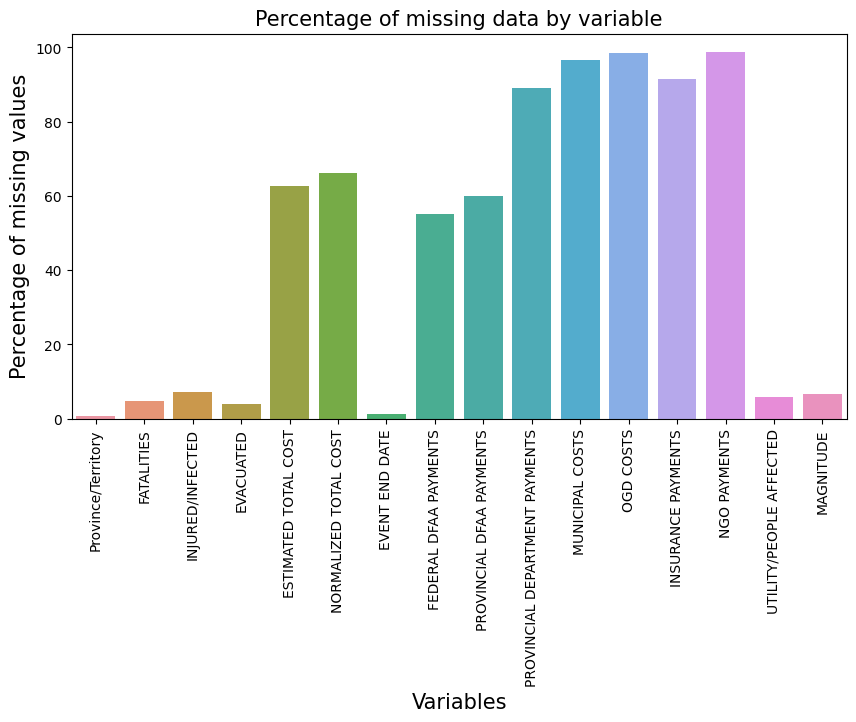

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.min_rows', 4)
# plotting a bar chart to show the percentage of missing values in each column with missing values 
def miss_plot(dataset):
  col = dataset.columns[dataset.isna().any().to_list()]
  f, ax = plt.subplots(figsize=(10, 5))
  plt.xticks(rotation='vertical')
  sns.barplot(x=col, y=(dataset[col].isnull().sum().values)/len(dataset)*100)
  plt.xlabel('Variables', fontsize=15)
  plt.ylabel('Percentage of missing values', fontsize=15)
  plt.title('Percentage of missing data by variable', fontsize=15)
  plt.show()
miss_plot(df)

In [5]:
df.describe()

,FATALITIES,INJURED/INFECTED,EVACUATED,ESTIMATED TOTAL COST,NORMALIZED TOTAL COST,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY/PEOPLE AFFECTED,MAGNITUDE
count,772.000000,7.520000e+02,778.000000,3.020000e+02,2.740000e+02,3.630000e+02,3.240000e+02,8.800000e+01,2.800000e+01,1.300000e+01,7.000000e+01,1.000000e+01,7.620000e+02,757.000000
mean,71.534974,2.690839e+03,879.263496,6.765913e+07,6.132096e+07,9.283559e+06,1.984893e+06,1.938211e+07,1.073077e+08,2.384392e+08,1.225279e+08,1.602879e+06,2.458286e+05,0.070013
std,1800.041722,7.293267e+04,5982.985146,3.216827e+08,3.125859e+08,5.220573e+07,4.605324e+06,5.262397e+07,3.875651e+08,3.361005e+08,3.164526e+08,4.103429e+06,4.712441e+06,0.708312
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.580000e+05,1.440030e+05,4.000000e+02,0.000000e+00,0.000000
25%,0.000000,0.000000e+00,0.000000,1.659252e+06,2.915595e+06,0.000000e+00,0.000000e+00,2.435748e+05,3.210948e+05,4.427167e+06,8.963278e+06,3.009000e+03,0.000000e+00,0.000000
50%,0.000000,0.000000e+00,0.000000,6.660731e+06,8.882046e+06,0.000000e+00,0.000000e+00,1.824500e+06,1.717692e+06,5.754438e+07,2.097676e+07,1.026950e+04,0.000000e+00,0.000000
75%,0.000000,0.000000e+00,149.500000,2.125496e+07,2.890953e+07,2.006054e+06,2.192594e+06,1.140858e+07,2.355999e+07,3.777358e+08,5.660775e+07,3.195688e+05,0.000000e+00,0.000000
max,50000.000000,2.000000e+06,107000.000000,4.635720e+09,4.843896e+09,6.653874e+08,4.256084e+07,3.000000e+08,2.018484e+09,1.000000e+09,1.712248e+09,1.307128e+07,1.281690e+08,9.000000


In [6]:
df.describe(include='object')

,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,Province/Territory,EVENT START DATE,EVENT END DATE
count,810,810,810,810,810,804,810,800
unique,1,1,3,18,526,33,720,722
top,Disaster,Natural,Meteorological - Hydrological,Flood,Prairie provinces,ON,2003-03-31 00:00:00,2003-03-31 00:00:00
freq,810,810,747,298,34,137,4,4


In [7]:
df

,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,Province/Territory,EVENT START DATE,FATALITIES,INJURED/INFECTED,EVACUATED,...,EVENT END DATE,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY/PEOPLE AFFECTED,MAGNITUDE
0,Disaster,Natural,Meteorological - Hydrological,Hurricane / Typhoon / Tropical Storm,New Brunswick,NB,2014-07-05 00:00:00,0.0,0.0,0.0,...,NaN,NaN,12500000.0,NaN,NaN,NaN,NaN,420000.0,NaN,NaN
1,Disaster,Natural,Meteorological - Hydrological,Flood,Southern Manitoba,MB,2014-06-25 00:00:00,0.0,0.0,560.0,...,NaN,NaN,NaN,NaN,NaN,1.000000e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,Disaster,Natural,Geological,Landslide,Upper Arrow Lake BC,BC,1903-02-28 00:00:00,0.0,0.0,0.0,...,1903-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
809,Disaster,Natural,Meteorological - Hydrological,Flood,Saint John River Basin NB,NB,1902-03-01 00:00:00,2.0,0.0,0.0,...,1902-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [8]:
df[df['EVENT END DATE'].isnull()][['EVENT START DATE','EVENT END DATE','EVENT TYPE']]

,EVENT START DATE,EVENT END DATE,EVENT TYPE
0,2014-07-05 00:00:00,NaN,Hurricane / Typhoon / Tropical Storm
1,2014-06-25 00:00:00,NaN,Flood
2,2014-06-15 00:00:00,NaN,Flood
5,2014-04-14 00:00:00,NaN,Flood
6,2014-04-14 00:00:00,NaN,Flood
7,2013-12-22 00:00:00,NaN,Winter Storm
9,2013-12-21 00:00:00,NaN,Winter Storm
14,2013-04-29 00:00:00,NaN,Flood
24,2012-06-23 00:00:00,NaN,Flood
25,2012-06-06 00:00:00,NaN,Flood


In [138]:
import datetime
from datetime import datetime
#today = pd.datetime.today()
#print (today)
#2018-01-09 10:51:42.701585

# changes date column in string to datetime
df['start_date'] = pd.to_datetime(df['EVENT START DATE'], errors='coerce')
df['end_date'] = pd.to_datetime(df['EVENT END DATE'], errors='coerce')

#calculates the difference between 
df['Difference'] = (df['end_date'] - df['start_date']).dt.days

In [10]:
df.describe()

,FATALITIES,INJURED/INFECTED,EVACUATED,ESTIMATED TOTAL COST,NORMALIZED TOTAL COST,FEDERAL DFAA PAYMENTS,PROVINCIAL DFAA PAYMENTS,PROVINCIAL DEPARTMENT PAYMENTS,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY/PEOPLE AFFECTED,MAGNITUDE,Difference
count,772.000000,7.520000e+02,778.000000,3.020000e+02,2.740000e+02,3.630000e+02,3.240000e+02,8.800000e+01,2.800000e+01,1.300000e+01,7.000000e+01,1.000000e+01,7.620000e+02,757.000000,798.000000
mean,71.534974,2.690839e+03,879.263496,6.765913e+07,6.132096e+07,9.283559e+06,1.984893e+06,1.938211e+07,1.073077e+08,2.384392e+08,1.225279e+08,1.602879e+06,2.458286e+05,0.070013,15.368421
std,1800.041722,7.293267e+04,5982.985146,3.216827e+08,3.125859e+08,5.220573e+07,4.605324e+06,5.262397e+07,3.875651e+08,3.361005e+08,3.164526e+08,4.103429e+06,4.712441e+06,0.708312,133.436001
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.580000e+05,1.440030e+05,4.000000e+02,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000,1.659252e+06,2.915595e+06,0.000000e+00,0.000000e+00,2.435748e+05,3.210948e+05,4.427167e+06,8.963278e+06,3.009000e+03,0.000000e+00,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000,6.660731e+06,8.882046e+06,0.000000e+00,0.000000e+00,1.824500e+06,1.717692e+06,5.754438e+07,2.097676e+07,1.026950e+04,0.000000e+00,0.000000,0.000000
75%,0.000000,0.000000e+00,149.500000,2.125496e+07,2.890953e+07,2.006054e+06,2.192594e+06,1.140858e+07,2.355999e+07,3.777358e+08,5.660775e+07,3.195688e+05,0.000000e+00,0.000000,2.000000
max,50000.000000,2.000000e+06,107000.000000,4.635720e+09,4.843896e+09,6.653874e+08,4.256084e+07,3.000000e+08,2.018484e+09,1.000000e+09,1.712248e+09,1.307128e+07,1.281690e+08,9.000000,2557.000000


# Data Cleaning and Preprocessing

## Handling Missing Values

### Event Type & Event Start and End date

In [58]:
#round(df.loc[df['EVENT TYPE'] == 'Flood', 'Difference'].mean())
df.loc[(df['EVENT TYPE']=='Flood')&(df['EVENT END DATE'].isnull()),'Difference']= df.loc[(df['EVENT TYPE']=='Flood')&(df['EVENT END DATE'].isnull()),'Difference'].fillna(0)

In [59]:
#round(df.loc[df['EVENT TYPE'] == 'Winter Storm', 'Difference'].mode())
df.loc[(df['EVENT TYPE']=='Winter Storm')&(df['EVENT END DATE'].isnull()),'Difference']= df.loc[(df['EVENT TYPE']=='Winter Storm')&(df['EVENT END DATE'].isnull()),'Difference'].fillna(0)

In [60]:
#round(df.loc[df['EVENT TYPE'] == 'Hurricane / Typhoon / Tropical Storm', 'Difference'].mode())
df.loc[(df['EVENT TYPE']=='Hurricane / Typhoon / Tropical Storm')&(df['EVENT END DATE'].isnull()),'Difference']= df.loc[(df['EVENT TYPE']=='Hurricane / Typhoon / Tropical Storm')&(df['EVENT END DATE'].isnull()),'Difference'].fillna(0)

In [61]:
# filling end date 
df.loc[df['EVENT END DATE'].isnull(),'EVENT END DATE'] = df.loc[df['EVENT END DATE'].isnull(),'EVENT START DATE']  + pd.to_timedelta(df.loc[df['EVENT END DATE'].isnull(),'Difference'], unit='D')

<ipython-input-61-1d6f3b3dc28e>:2: PerformanceWarning: Adding/subtracting object-dtype array to TimedeltaArray not vectorized.
  df.loc[df['EVENT END DATE'].isnull(),'EVENT END DATE'] = df.loc[df['EVENT END DATE'].isnull(),'EVENT START DATE']  + pd.to_timedelta(df.loc[df['EVENT END DATE'].isnull(),'Difference'], unit='D')


In [62]:
df.drop(['start_date','end_date'],axis=1)
# changes date column in string to datetime
df['start_date'] = pd.to_datetime(df['EVENT START DATE'], errors='coerce')
df['end_date'] = pd.to_datetime(df['EVENT END DATE'], errors='coerce')


In [63]:
df[df['end_date'].isnull()][['EVENT END DATE','end_date']]

,EVENT END DATE,end_date
99,0/08/2008,NaT


In [141]:
df.loc[df['end_date'].isnull(),'end_date']='01-08-2008'

In [18]:
info_on_missing_values(df)

,Total Missing Val,Percentage,Data Type
NGO PAYMENTS,800,98.77,float64
OGD COSTS,797,98.40,float64
MUNICIPAL COSTS,782,96.54,float64
INSURANCE PAYMENTS,740,91.36,float64
PROVINCIAL DEPARTMENT PAYMENTS,722,89.14,float64
NORMALIZED TOTAL COST,536,66.17,float64
ESTIMATED TOTAL COST,508,62.72,float64
PROVINCIAL DFAA PAYMENTS,486,60.00,float64
FEDERAL DFAA PAYMENTS,447,55.19,float64
INJURED/INFECTED,58,7.16,float64


In [140]:
df.loc[df['start_date'].isnull(),'start_date']='01-08-2008'

In [20]:
info_on_missing_values(df)

,Total Missing Val,Percentage,Data Type
NGO PAYMENTS,800,98.77,float64
OGD COSTS,797,98.40,float64
MUNICIPAL COSTS,782,96.54,float64
INSURANCE PAYMENTS,740,91.36,float64
PROVINCIAL DEPARTMENT PAYMENTS,722,89.14,float64
NORMALIZED TOTAL COST,536,66.17,float64
ESTIMATED TOTAL COST,508,62.72,float64
PROVINCIAL DFAA PAYMENTS,486,60.00,float64
FEDERAL DFAA PAYMENTS,447,55.19,float64
INJURED/INFECTED,58,7.16,float64


### Fatalities and evacuated

In [66]:
#WHERE FATALITIES ARE NULL WE FILL WITH 0
df.loc[(df['FATALITIES'].isnull()),'FATALITIES']= df.loc[(df['FATALITIES'].isnull()),'FATALITIES'].fillna(0)

In [67]:
#WHERE EVACUATED ARE NULL WE FILL WITH 0
df.loc[(df['EVACUATED'].isnull()),'EVACUATED']= df.loc[(df['EVACUATED'].isnull()),'EVACUATED'].fillna(0)

In [23]:
info_on_missing_values(df)

,Total Missing Val,Percentage,Data Type
NGO PAYMENTS,800,98.77,float64
OGD COSTS,797,98.40,float64
MUNICIPAL COSTS,782,96.54,float64
INSURANCE PAYMENTS,740,91.36,float64
PROVINCIAL DEPARTMENT PAYMENTS,722,89.14,float64
NORMALIZED TOTAL COST,536,66.17,float64
ESTIMATED TOTAL COST,508,62.72,float64
PROVINCIAL DFAA PAYMENTS,486,60.00,float64
FEDERAL DFAA PAYMENTS,447,55.19,float64
INJURED/INFECTED,58,7.16,float64


In [68]:
#WHERE FATALITIES ARE NULL WE FILL WITH 0
#df.loc[(df['FATALITIES'].isnull()),'FATALITIES']= df.loc[(df['FATALITIES'].isnull()),'FATALITIES'].fillna(0)
df.loc[(df['EVACUATED'].isnull()),['EVACUATED','FATALITIES']]

,EVACUATED,FATALITIES


In [147]:
df.to_csv('case_study_clean_data.csv')

### Province section
There are only six missing values in Province/Territory Column.
In order to fill the missing value the place column will be used.

In [69]:
#printing the rows with missing province
df[df['Province/Territory'].isnull()][['PLACE','Province/Territory']]

,PLACE,Province/Territory
26,Thunder Bay,NaN
28,Kirkland Lake,NaN
75,Déléage to Mont-Laurier,NaN
81,Notre-Dame-des-Prairies,NaN
285,45 miles southwest of the islands of Saint-Pie...,NaN
756,St. Lawrence River,NaN


In [70]:
# filling place(s) in ontario with ON
df.loc[(df['PLACE']=='Thunder Bay')|(df['PLACE']=='Kirkland Lake')|(df['PLACE']=='St. Lawrence River'),'Province/Territory'] = 'ON'

In [71]:
# filling place(s) in quebec with QC
df.loc[(df['PLACE']=='Déléage to Mont-Laurier')|(df['PLACE']=='Notre-Dame-des-Prairies'),'Province/Territory'] = 'QC'

In [72]:
# filling place(s) in newfoundland and labrador with NL
df.loc[(df['PLACE']=='45 miles southwest of the islands of Saint-Pierre-et-Miquelon'),'Province/Territory'] = 'NL'

In [73]:
df['Province/Territory'].unique()

array(['NB', 'MB', 'AB', 'BC', 'NT', 'QC', 'ON', 'SK', 'NL', 'BC YT NT',
       'QC NB NS PE NL', 'NB NS', 'NS', 'AB SK', 'YT', 'Across Canada',
       'PE', 'Maritimes', 'QC NB', 'NU', 'ON QC', 'AB MB', 'NS PE',
       'BC AB', 'Western Canada', 'ON QC NB', 'Eastern Canada', 'NB PE',
       'Prairies', 'BC AB SK MB ON', 'MB ON', 'NS PE NL', 'SK MB'],
      dtype=object)

In [146]:
# Changing province columns with multiple provinces to 'Others'
df.loc[(df['Province/Territory']=='BC YT NT')|(df['Province/Territory']=='QC NB NS PE NL')|(df['Province/Territory']=='NB NS')|(df['Province/Territory']=='AB SK')|(df['Province/Territory']=='Across Canada')|(df['Province/Territory']=='Maritimes')|(df['Province/Territory']=='QC NB')|(df['Province/Territory']=='ON QC')|(df['Province/Territory']=='AB MB')|(df['Province/Territory']=='NS PE')|(df['Province/Territory']=='BC AB')|(df['Province/Territory']=='Western Canada')|(df['Province/Territory']=='ON QC NB')|(df['Province/Territory']=='Eastern Canada')|(df['Province/Territory']=='NB PE')|(df['Province/Territory']=='BC AB SK MB ON')|(df['Province/Territory']=='MB ON')|(df['Province/Territory']=='NS PE NL')|(df['Province/Territory']=='SK MB')|(df['Province/Territory']=='Prairies'),'Province/Territory'] = 'Others'

In [53]:
df['Province/Territory'].unique()

array(['NB', 'MB', 'AB', 'BC', 'NT', 'QC', 'ON', 'SK', 'NL', 'Others',
       'NS', 'YT', 'PE', 'NU'], dtype=object)

In [86]:
# MB ON


In [84]:
region_list = []
for row in df['Province/Territory']:
  if row == 'BC YT NT' :    
    region_list.append('Northern Canada')
  elif row == 'YT'or row == 'NT'or row == 'NU':   
    region_list.append('Northern Canada')
  elif row == 'BC'or row == 'SK'or row == 'AB'or row == 'BC' or row == 'MB':  
    region_list.append('Western Canada')
  elif row == 'ON' or row == 'QC' or row == 'NB' or row == 'PE' or row == 'NS' or row == 'NL':  
    region_list.append('Eastern Canada')
  elif row == 'QC NB NS PE NL' or row == 'NB NS' or row=='QC NB' or row=='ON QC' or row=='Eastern Canada' or row=='NS PE'or row=='ON QC NB' or row=='NB PE'or row=='NS PE NL'or row=='Maritimes': 
     region_list.append('Eastern Canada')
  elif row == 'AB SK'or row=='AB MB'or row =='BC AB'or row =='Western Canada'or row=='BC AB SK MB ON'or row=='SK MB'or row=='Prairies': 
    region_list.append('Western Canada')        
  else:           
    region_list.append('Across Canada')

In [87]:
df['Region']=region_list

In [88]:
df[['PLACE','Province/Territory','Region']]

,PLACE,Province/Territory,Region
0,New Brunswick,NB,Eastern Canada
1,Southern Manitoba,MB,Western Canada
...,...,...,...
808,Upper Arrow Lake BC,BC,Western Canada
809,Saint John River Basin NB,NB,Eastern Canada


In [90]:
info_on_missing_values(df)

,Total Missing Val,Percentage,Data Type
NGO PAYMENTS,800,98.77,float64
OGD COSTS,797,98.40,float64
MUNICIPAL COSTS,782,96.54,float64
INSURANCE PAYMENTS,740,91.36,float64
PROVINCIAL DEPARTMENT PAYMENTS,722,89.14,float64
NORMALIZED TOTAL COST,536,66.17,float64
ESTIMATED TOTAL COST,508,62.72,float64
PROVINCIAL DFAA PAYMENTS,486,60.00,float64
FEDERAL DFAA PAYMENTS,447,55.19,float64
INJURED/INFECTED,58,7.16,float64


In [91]:
df[df['UTILITY/PEOPLE AFFECTED'].isnull()]

,EVENT CATEGORY,EVENT GROUP,EVENT SUBGROUP,EVENT TYPE,PLACE,Province/Territory,EVENT START DATE,FATALITIES,INJURED/INFECTED,EVACUATED,...,MUNICIPAL COSTS,OGD COSTS,INSURANCE PAYMENTS,NGO PAYMENTS,UTILITY/PEOPLE AFFECTED,MAGNITUDE,start_date,end_date,Difference,Region
0,Disaster,Natural,Meteorological - Hydrological,Hurricane / Typhoon / Tropical Storm,New Brunswick,NB,2014-07-05 00:00:00,0.0,0.0,0.0,...,NaN,NaN,NaN,420000.0,NaN,NaN,2014-07-05,2014-07-05,0.0,Eastern Canada
1,Disaster,Natural,Meteorological - Hydrological,Flood,Southern Manitoba,MB,2014-06-25 00:00:00,0.0,0.0,560.0,...,NaN,1.000000e+09,NaN,NaN,NaN,NaN,2014-06-25,2014-06-25,0.0,Western Canada
2,Disaster,Natural,Meteorological - Hydrological,Flood,Southern Alberta,AB,2014-06-15 00:00:00,0.0,0.0,500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-15,2014-06-15,0.0,Western Canada
3,Disaster,Natural,Meteorological - Hydrological,Wildfire,British Columbia,BC,2014-06-01 00:00:00,0.0,0.0,4500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-01,2014-09-30,121.0,Western Canada
4,Disaster,Natural,Meteorological - Hydrological,Wildfire,Northwest Territories,NT,2014-06-01 00:00:00,0.0,0.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-06-01,2014-09-18,109.0,Northern Canada
5,Disaster,Natural,Meteorological - Hydrological,Flood,New Brunswick,NB,2014-04-14 00:00:00,0.0,0.0,1495.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-14,2014-04-14,0.0,Eastern Canada
6,Disaster,Natural,Meteorological - Hydrological,Flood,Quebec,QC,2014-04-14 00:00:00,0.0,0.0,1000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2014-04-14,2014-04-14,0.0,Eastern Canada
7,Disaster,Natural,Meteorological - Hydrological,Winter Storm,New Brunswick,NB,2013-12-22 00:00:00,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2013-12-22,2013-12-22,0.0,Eastern Canada
9,Disaster,Natural,Meteorological - Hydrological,Winter Storm,Southern Ontario,ON,2013-12-21 00:00:00,2.0,25.0,0.0,...,NaN,NaN,NaN,2490000.0,NaN,NaN,2013-12-21,2013-12-21,0.0,Eastern Canada
11,Disaster,Natural,Meteorological - Hydrological,Flood,Southern Alberta,AB,2013-06-19 00:00:00,4.0,0.0,100000.0,...,NaN,NaN,1.700000e+09,NaN,NaN,NaN,2013-06-19,2013-06-28,9.0,Western Canada


In [102]:
# filling empty rows in utility with zero (mode)
df.loc[(df['UTILITY/PEOPLE AFFECTED'].isnull()),'UTILITY/PEOPLE AFFECTED']=0

In [120]:
# filling empty rows in utility with zero (mode)
df.loc[(df['INJURED/INFECTED'].isnull()),'INJURED/INFECTED']=0

In [127]:
df[(df['MAGNITUDE']!=0)&(~df['MAGNITUDE'].isnull())][['EVENT TYPE','MAGNITUDE']]

,EVENT TYPE,MAGNITUDE
179,Tornado,2.0
407,Earthquake,6.0
422,Earthquake,6.0
655,Tsunami,8.0
678,Tsunami,9.0
716,Earthquake,8.0
751,Earthquake,7.0
758,Tsunami,7.0


In [130]:
df[df['EVENT TYPE']=='Tsunami'][['EVENT TYPE','MAGNITUDE']]

,EVENT TYPE,MAGNITUDE
655,Tsunami,8.0
678,Tsunami,9.0
758,Tsunami,7.0


In [131]:
df[df['EVENT TYPE']=='Earthquake'][['EVENT TYPE','MAGNITUDE']]

,EVENT TYPE,MAGNITUDE
60,Earthquake,0.0
407,Earthquake,6.0
422,Earthquake,6.0
716,Earthquake,8.0
751,Earthquake,7.0


In [132]:
# filling empty rows in MAGNITUDE with zero (mode)
df.loc[(df['MAGNITUDE'].isnull()),'MAGNITUDE']=0

In [144]:
info_on_missing_values(df)

,Total Missing Val,Percentage,Data Type
NGO PAYMENTS,800,98.77,float64
OGD COSTS,797,98.40,float64
MUNICIPAL COSTS,782,96.54,float64
INSURANCE PAYMENTS,740,91.36,float64
PROVINCIAL DEPARTMENT PAYMENTS,722,89.14,float64
NORMALIZED TOTAL COST,536,66.17,float64
ESTIMATED TOTAL COST,508,62.72,float64
PROVINCIAL DFAA PAYMENTS,486,60.00,float64
FEDERAL DFAA PAYMENTS,447,55.19,float64


In [137]:
data_for_estimated_cost = df[(~df['ESTIMATED TOTAL COST'].isnull())]

In [143]:
#calculates the difference between 
df['Difference'] = (df['end_date'] - df['start_date']).dt.days

In [ ]:
df['end_date'].dt.year

0         NaN
1         NaN
        ...  
808    1903.0
809    1902.0
Name: end_date, Length: 810, dtype: float64

In [ ]:
df['start_date_year']=df['start_date'].dt.year
a=df.groupby('start_date_year')['FATALITIES'].sum().reset_index(name='fat')

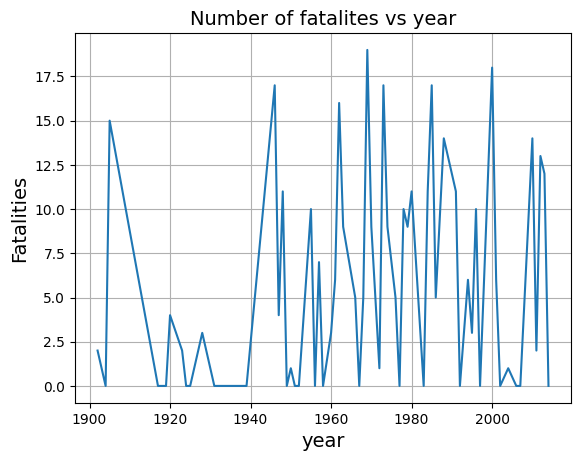

In [ ]:
t= a[a['fat']<20]
#plt.plot(t['start_date_year'], t['fat'], color='red', marker='o')
sns.lineplot(x = "start_date_year", y = "fat", data=t)
plt.title('Number of fatalites vs year', fontsize=14)
plt.xlabel('year', fontsize=14)
plt.ylabel('Fatalities', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
df['Province/Territory'].unique()

array(['NB', 'MB', 'AB', 'BC', 'NT', 'QC', 'ON', 'SK', 'NL', 'BC YT NT',
       nan, 'QC NB NS PE NL', 'NB NS', 'NS', 'AB SK', 'YT',
       'Across Canada', 'PE', 'Maritimes', 'QC NB', 'NU', 'ON QC',
       'AB MB', 'NS PE', 'BC AB', 'Western Canada', 'ON QC NB',
       'Eastern Canada', 'NB PE', 'Prairies', 'BC AB SK MB ON', 'MB ON',
       'NS PE NL', 'SK MB'], dtype=object)

In [ ]:
#from numpy import NAN
df[df['Province/Territory']=='Across Canada']['PLACE']

86                                         Across Canada
99                                         Across Canada
212    Across Canada, largely in the Greater Toronto ...
234    Across Canada, concentrated in Saskatchewan an...
349                                 Alberta to Maritimes
419                                     Yukon to Ontario
508                                        Across Canada
540                                     Yukon to Ontario
705                                        Across Canada
743                                        Across Canada
765                                        Across Canada
781                                        Across Canada
Name: PLACE, dtype: object

In [ ]:
df[df['Province/Territory']=='BC AB SK MB ON']['PLACE']

408    British Columbia to Ontario
Name: PLACE, dtype: object

In [ ]:
df[df['Province/Territory'].isnull()][['PLACE','Province/Territory']]

,PLACE,Province/Territory
26,Thunder Bay,NaN
28,Kirkland Lake,NaN
75,Déléage to Mont-Laurier,NaN
81,Notre-Dame-des-Prairies,NaN
285,45 miles southwest of the islands of Saint-Pie...,NaN
756,St. Lawrence River,NaN


In [ ]:
df[df['Province/Territory']== 'QC NB NS PE NL'][['PLACE','Province/Territory']]

,PLACE,Province/Territory
32,"Quebec, Newfoundland and Labrador, New Brunswi...",QC NB NS PE NL
